In [ ]:
# Setup and load the diferent data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


miRNA_full_data_file = 'miRNAFull_zscored.csv' # full miRNA data, 217 miRNA x 218 samples

miRNA_data_file = 'miRNA_zscored.csv' # subset miRNA data, 217 miRNA x 89 samples. 89 are the epithelial samples
mRNA_full_data_file = 'mRNA_zscored.csv' # full mRNA data, 16,063 mRNA x 89 samples. 89 are the epithelial samples
gi_file = 'gi.csv' # sample name to GI mapping 89 samples, 1 if GI, 0 if not GI
tumor_file = 'classes.csv' # sample name to tumor type mapping, 1 if tumor, 0 if normal


In [24]:
miRNA_full = pd.read_csv(miRNA_full_data_file, index_col=0)
gi_labels = pd.read_csv(gi_file, index_col=0)
classes = pd.read_csv(classes_file, index_col=0)
miRNA = pd.read_csv(miRNA_data_file, index_col=0)
mRNA = pd.read_csv(mRNA_full_data_file, index_col=0)

print("Data shapes:")
print('microRNA full data shape:', miRNA_full.shape)
print('mRNA full data shape:', mRNA.shape)
print('microRNA subset data shape:', miRNA.shape)
print('GI labels shape:', gi_labels.shape)
print('Tumor classes shape:', classes.shape)

Data shapes:
microRNA full data shape: (217, 218)
mRNA full data shape: (16063, 89)
microRNA subset data shape: (217, 89)
GI labels shape: (89, 1)
Tumor classes shape: (89, 1)


Text(0.5, 23.52222222222222, 'Samples')

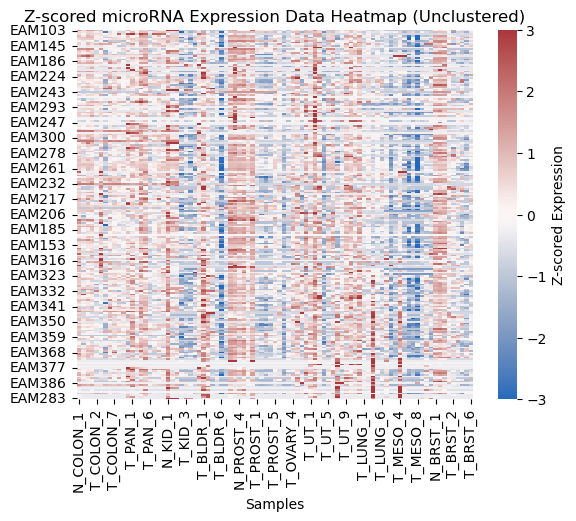

In [ ]:
# Example heatmap of z-scored data from Fig 2A (not clustered)
clims = (-3, 3) # have to do this to match the figure saturation. 
sns.heatmap(miRNA, cmap='vlag', cbar_kws={'label': 'Z-scored Expression'}, vmin=clims[0], vmax=clims[1])
plt.title('Z-scored microRNA Expression Data Heatmap (Unclustered)')
plt.xlabel('Samples')

In [ ]:
# let's cluster that using hierarchical clustering and seaborn

custom_cmap = sns.diverging_palette(240, 10, as_cmap=True)  # blue to red
